In [1]:
import os

In [3]:
import pandas as pd
data_file = os.path.join('data', 'spam.csv')
df = pd.read_csv(data_file, encoding='latin-1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""",GE,"GNT:-)"""
freq,4825,30,3,2,2


In [6]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
v1    5572 non-null object
v2    5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


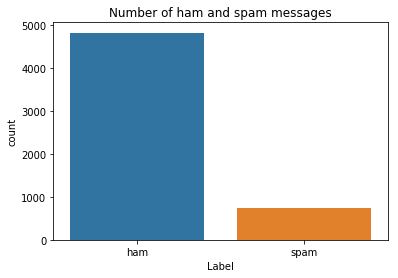

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.countplot(df.v1)
plt.xlabel('Label')
plt.title('Number of ham and spam messages')

results_dir = 'results'
if not os.path.exists(results_dir):
    os.mkdir(results_dir)
plt.savefig( os.path.join(results_dir, 'ham-spam-distribution.png') )

In [13]:
from sklearn.preprocessing import LabelEncoder

X = df.v2
y = df.v1
label_encoder = LabelEncoder()

In [14]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
5       FreeMsg Hey there darling it's been 3 week's n...
6       Even my brother is not like to speak with me. ...
7       As per your request 'Melle Melle (Oru Minnamin...
8       WINNER!! As a valued network customer you have...
9       Had your mobile 11 months or more? U R entitle...
10      I'm gonna be home soon and i don't want to tal...
11      SIX chances to win CASH! From 100 to 20,000 po...
12      URGENT! You have won a 1 week FREE membership ...
13      I've been searching for the right words to tha...
14                    I HAVE A DATE ON SUNDAY WITH WILL!!
15      XXXMobileMovieClub: To use your credit, click ...
16                             Oh k...i'm watching here:)
17      Eh u r

In [15]:
y

0        ham
1        ham
2       spam
3        ham
4        ham
5       spam
6        ham
7        ham
8       spam
9       spam
10       ham
11      spam
12      spam
13       ham
14       ham
15      spam
16       ham
17       ham
18       ham
19      spam
20       ham
21       ham
22       ham
23       ham
24       ham
25       ham
26       ham
27       ham
28       ham
29       ham
        ... 
5542     ham
5543     ham
5544     ham
5545     ham
5546     ham
5547    spam
5548     ham
5549     ham
5550     ham
5551     ham
5552     ham
5553     ham
5554     ham
5555     ham
5556     ham
5557     ham
5558     ham
5559     ham
5560     ham
5561     ham
5562     ham
5563     ham
5564     ham
5565     ham
5566    spam
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: v1, Length: 5572, dtype: object

In [16]:
y = label_encoder.fit_transform(y)

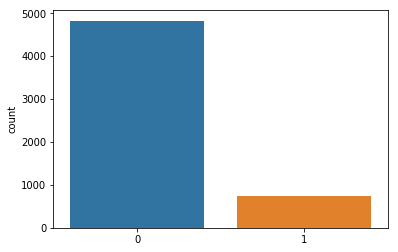

In [17]:
sns.countplot(y)

In [18]:
y = y.reshape(-1, 1)

In [19]:
y

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [21]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence

max_words = 1000
max_len = 150

c:\users\vaibggup\appdata\local\programs\python\python35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
c:\users\vaibggup\appdata\local\programs\python\python35\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\vaibggup\appdata\local\programs\python\python35\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([(

In [22]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

In [23]:
sequences = tokenizer.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences, maxlen=max_len)

In [24]:
sequences_matrix[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0, 383, 310, 356, 344,   6])

In [25]:
sequences_matrix.shape, X_train.shape

((4179, 150), (4179,))

In [26]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add( layers.Embedding(max_words, 50, input_length=max_len) )
model.add( layers.LSTM(64) )
model.add( layers.Dense(256, activation='relu') )
model.add( layers.Dropout(0.5) )
model.add( layers.Dense(1, activation='sigmoid') )

model.compile(loss='binary_crossentropy',
              metrics=['accuracy'],
              optimizer=optimizers.RMSprop(lr=1e-4))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 150, 50)           50000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               16640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 96,337
Trainable params: 96,337
Non-trainable params: 0
_________________________________________________________________
None


In [93]:
from keras.callbacks import EarlyStopping

history = model.fit(sequences_matrix, y_train, batch_size=128, epochs=40, 
                    validation_split=0.2, 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3)])

Train on 3343 samples, validate on 836 samples
Epoch 1/40
3343/3343 [==============================] - 11s 3ms/step - loss: 0.6785 - acc: 0.8415 - val_loss: 0.6599 - val_acc: 0.8852
Epoch 2/40
3343/3343 [==============================] - 9s 3ms/step - loss: 0.6370 - acc: 0.8621 - val_loss: 0.5916 - val_acc: 0.8852
Epoch 3/40
3343/3343 [==============================] - 9s 3ms/step - loss: 0.5030 - acc: 0.8621 - val_loss: 0.3398 - val_acc: 0.8852
Epoch 4/40
3343/3343 [==============================] - 9s 3ms/step - loss: 0.3575 - acc: 0.8621 - val_loss: 0.3241 - val_acc: 0.8852
Epoch 5/40
3343/3343 [==============================] - 9s 3ms/step - loss: 0.3386 - acc: 0.8621 - val_loss: 0.2925 - val_acc: 0.8852
Epoch 6/40
3343/3343 [==============================] - 9s 3ms/step - loss: 0.3211 - acc: 0.8621 - val_loss: 0.2710 - val_acc: 0.8852
Epoch 7/40
3343/3343 [==============================] - 9s 3ms/step - loss: 0.2943 - acc: 0.8621 - val_loss: 0.2614 - val_acc: 0.8852
Epoch 8/40
334

In [0]:
def plot_loss_accuracy(history):
  
  fig = plt.figure()
  
  x_axis = range( len(history.history['loss']) )
  
  ax= fig.add_subplot(121)
  ax.scatter(x_axis, history.history['loss'], label='Training Loss')
  ax.plot(x_axis, history.history['val_loss'], label='Validation Loss')
  plt.legend()
  plt.title('Loss Plot')
  
  ax = fig.add_subplot(122)
  ax.scatter(x_axis, history.history['acc'], label='Training Accuracy')
  ax.plot(x_axis, history.history['val_acc'], label='Validation Accuracy')
  plt.legend()
  plt.title('Accuracy Plot')
  
  plt.show()

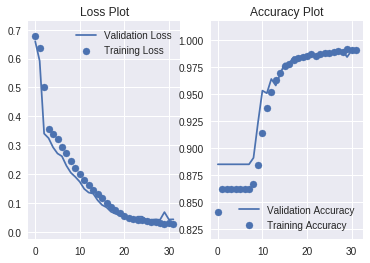

In [95]:
plot_loss_accuracy(history)

In [0]:
model.save('one_layer_rnn_2.h5')

In [0]:
test_sequences = tokenizer.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences, maxlen=max_len)

In [98]:
model.evaluate(test_sequences_matrix, y_test)

1393/1393 [==============================] - 5s 4ms/step


[0.04838281919362728, 0.9856424982053122]

In [0]:
y_pred = model.predict(test_sequences_matrix)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


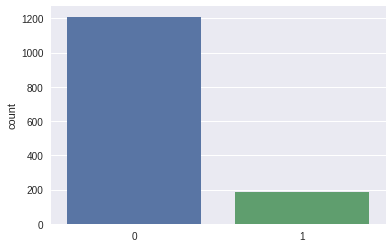

In [100]:
y_pred = y_pred.reshape(-1)
y_pred = [0 if elem < 0.5 else 1 for elem in y_pred]

sns.countplot(y_pred)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


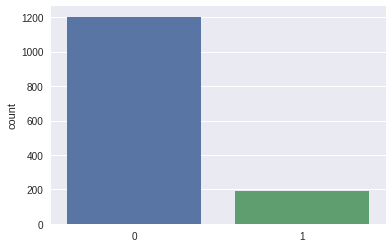

In [101]:
sns.countplot(y_test.reshape(-1))